In [463]:
import pandas as pd
import seaborn as sns

df_counter = None
csv_name = 'fixed_resampled140hz_counter.csv'
path = 'C:/Users/alkurdi/Downloads/WESAD'
df_counter = pd.read_csv(path + '/' + csv_name, index_col=0,  header=1 )
df_counter.reset_index( inplace=True, drop=True)
df_counter.name = 'Len of column vector in original data'
df_columns = [i.split(' ')[0].upper() for i in list(df_counter.columns)]
df_counter.columns = df_columns
df_counter['SUBJECT'] = df_counter['SUBJECT'].str.replace('S','')

In [464]:
import numpy as np 
df = df_counter.loc[:,~df_counter.columns.duplicated()].copy()
df_counter['SUBJECT'] = [int(i) for i in df_counter['SUBJECT'].values]

df.drop(columns='SUBJECT', inplace=True)    
melted = df.melt()
melted.rename(columns={'variable':'signal', 'value':'len'}, inplace=True)

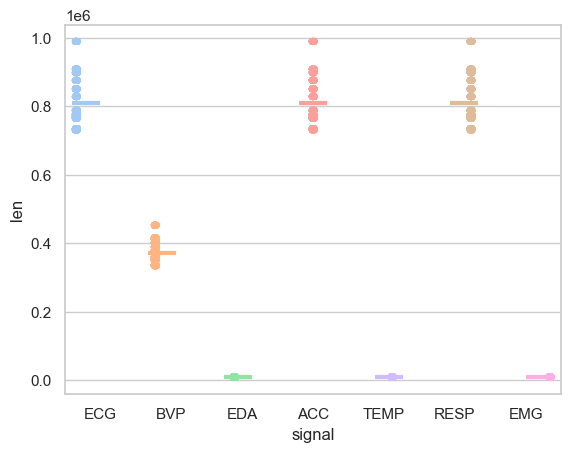

In [465]:
sns.set_theme(style="whitegrid", palette="pastel");
sns.pointplot(
    data=melted, x="signal", y="len", hue="signal",
    dodge=.4, linestyle="none", errorbar=None,
    marker="_", markersize=20, markeredgewidth=3,
)
sns.stripplot(
    data=melted, x="signal", y="len", hue="signal",
    dodge=True,  legend=False,
);


# Modify wesad to binary dataset

In [502]:
import os
import pickle

subject_ids = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]

subject_list = {}
root = 'C:/Users/alkurdi/Downloads/WESAD/WESAD'
for i in subject_ids:
    with open(f'{root}/S{i}/S{i}.pkl', 'rb') as file:
            subject_list[i] = pickle.load(file, encoding='latin1')
    print('how many labels = 1', len(subject_list[i]['label'][subject_list[i]['label']==1]))
    subject_list[i]['label'][subject_list[i]['label'] == 3] = 1
    print('how many labels = 1 after', len(subject_list[i]['label'][subject_list[i]['label']==1]))
    with open(f'{root}/S{i}/S{i}binary.pkl', 'wb') as file:
            pickle.dump(subject_list[i], file)

how many labels = 1 800800
how many labels = 1 after 1054200
how many labels = 1 798000
how many labels = 1 after 1060500
how many labels = 1 810601
how many labels = 1 after 1071001
how many labels = 1 838600
how many labels = 1 after 1100400
how many labels = 1 826000
how many labels = 1 after 1086400
how many labels = 1 830200
how many labels = 1 after 1090601
how many labels = 1 818300
how many labels = 1 after 1077299
how many labels = 1 826000
how many labels = 1 after 1086400
how many labels = 1 826000
how many labels = 1 after 1086400
how many labels = 1 826000
how many labels = 1 after 1083600
how many labels = 1 826001
how many labels = 1 after 1093401
how many labels = 1 826000
how many labels = 1 after 1086401
how many labels = 1 822500
how many labels = 1 after 1082900
how many labels = 1 826000
how many labels = 1 after 1083600
how many labels = 1 826700
how many labels = 1 after 1087100


In [498]:
subject_list[i]['label'][subject_list[i]['label'] == 3] = 1

In [ ]:
for key in subject17['signal']['chest'].keys():
    print(len(subject17['signal']['chest'][key]))
    print(len(subject17B['signal']['chest'][key]))

for key in subject17['signal']['wrist'].keys():
    print(len(subject17['signal']['wrist'][key]))
    print(len(subject17B['signal']['wrist'][key]))



In [528]:
with open(f'{root}/S{17}/S{17}.pkl', 'rb') as file:
            subject17 = pickle.load(file, encoding='latin1')
with open(f'{root}/S{17}/S{17}_2.pkl', 'wb') as file:
            pickle.dump(subject17, file)